# GLP-1 Safety Surveillance: Descriptive Analyses

This notebook reads the curated CSVs (Reports.csv, Drugs.csv, Reactions.csv) and generates:
- Report volumes over time
- Top reaction terms (overall and by drug role)
- Outcome severity distributions
- Drug role breakdown

**Note:** FAERS is a voluntary reporting system. These analyses cannot establish causation or calculate incidence rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

try:
    deliverables_dir = Path('.')
    reports = pd.read_csv(deliverables_dir / 'Reports.csv')
except FileNotFoundError:
    deliverables_dir = Path('../deliverables')
    reports = pd.read_csv(deliverables_dir / 'Reports.csv')

drugs = pd.read_csv(deliverables_dir / 'Drugs.csv')
reactions = pd.read_csv(deliverables_dir / 'Reactions.csv')

# Parse dates
reports['received_date'] = pd.to_datetime(reports['received_date'], errors='coerce')
reports['year'] = reports['received_date'].dt.year
reports['month'] = reports['received_date'].dt.to_period('M').astype(str)
reports['quarter'] = reports['received_date'].dt.to_period('Q').astype(str)

print(f"Loaded {len(reports):,} reports, {len(drugs):,} drug entries, {len(reactions):,} reactions")
reports.head()

Loaded 25,100 reports, 136,581 drug entries, 65,341 reactions


,safetyreportid,received_date,event_date,patient_age_years,age_unit_raw,patient_sex,reporter_type,reporter_type_raw,country,country_raw,death,hospitalization,life_threatening,disability,congenital_anomaly,intervention,other,year,month,quarter
0,23353881,2024-01-01,2025-09-24,43.0,801.0,U,OTHER,2,US,US,True,True,True,True,True,True,True,2024,2024-01,2024Q1
1,23354795,2024-01-01,2024-01-01,66.0,801.0,U,OTHER,2,US,US,True,True,True,True,True,True,True,2024,2024-01,2024Q1
2,23354797,2024-01-01,2024-01-01,NaN,NaN,U,OTHER,2,US,US,True,True,True,True,True,True,True,2024,2024-01,2024Q1
3,23354805,2024-01-01,2024-01-01,NaN,NaN,U,OTHER,2,US,US,True,True,True,True,True,True,True,2024,2024-01,2024Q1
4,23354806,2024-01-01,2024-01-01,NaN,NaN,U,OTHER,2,US,US,True,True,True,True,True,True,True,2024,2024-01,2024Q1


## 1. Report Volumes Over Time

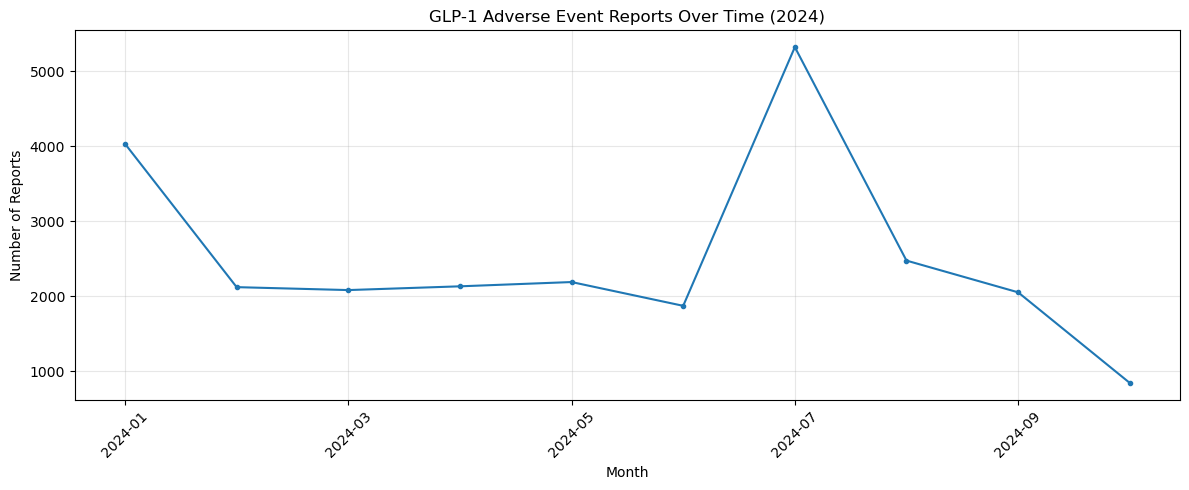


Quarterly breakdown:


quarter
2024Q1    8229
2024Q2    6187
2024Q3    9842
2024Q4     842
dtype: int64

In [15]:
# Monthly report counts
monthly_counts = reports.groupby('month').size()

plt.figure(figsize=(12, 5))
monthly_counts.plot(kind='line', marker='o', markersize=3)
plt.title('GLP-1 Adverse Event Reports Over Time (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nQuarterly breakdown:")
reports.groupby('quarter').size()

## 2. Top Reaction Terms

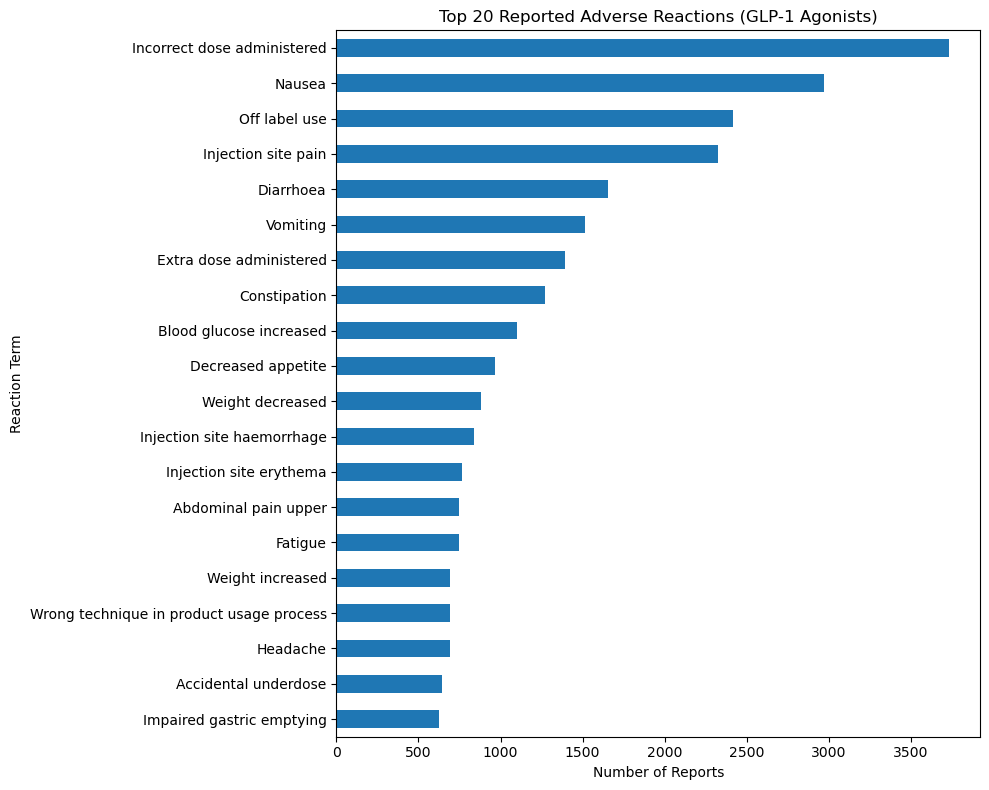

reaction_term_text
Incorrect dose administered                 3735
Nausea                                      2973
Off label use                               2416
Injection site pain                         2323
Diarrhoea                                   1656
Vomiting                                    1515
Extra dose administered                     1395
Constipation                                1269
Blood glucose increased                     1098
Decreased appetite                           969
Weight decreased                             884
Injection site haemorrhage                   841
Injection site erythema                      768
Abdominal pain upper                         748
Fatigue                                      746
Weight increased                             691
Wrong technique in product usage process     690
Headache                                     690
Accidental underdose                         642
Impaired gastric emptying                    623
N

In [16]:
# Top 20 reactions overall
top_reactions = reactions['reaction_term_text'].value_counts().head(20)

plt.figure(figsize=(10, 8))
top_reactions.plot(kind='barh')
plt.title('Top 20 Reported Adverse Reactions (GLP-1 Agonists)')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction Term')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_reactions

## 3. Drug Role Analysis

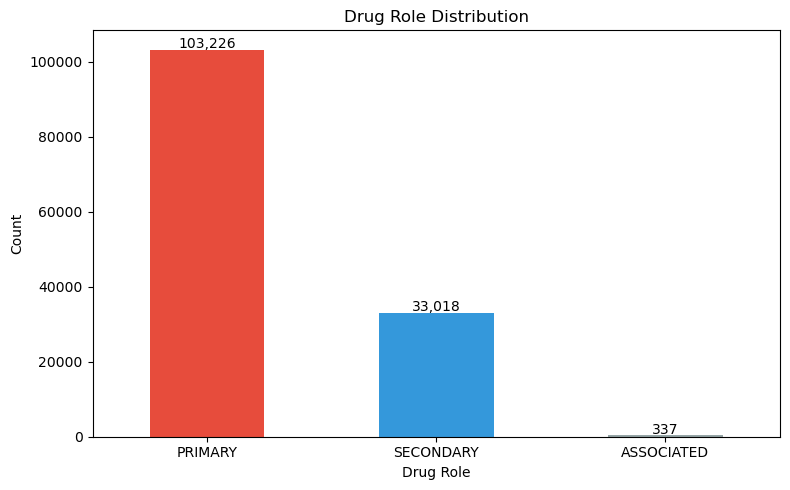

PRIMARY = Suspect drug (GLP-1 suspected of causing reaction)
SECONDARY = Concomitant drug (taken alongside)
ASSOCIATED = Other associated drug

Total drug entries: 136,581


drug_role
PRIMARY       103226
SECONDARY      33018
ASSOCIATED       337
Name: count, dtype: int64

In [ ]:
role_counts = drugs['drug_role'].value_counts()

plt.figure(figsize=(8, 5))
role_counts.plot(kind='bar', color=['#e74c3c', '#3498db', '#95a5a6'])
plt.title('Drug Role Distribution')
plt.xlabel('Drug Role')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(role_counts.values):
    plt.text(i, v + 500, f'{v:,}', ha='center')
plt.tight_layout()
plt.show()

print("PRIMARY = Suspect drug (GLP-1 suspected of causing reaction)")
print("SECONDARY = Concomitant drug (taken alongside)")
print("ASSOCIATED = Other associated drug")
print(f"\nTotal drug entries: {len(drugs):,}")
role_counts

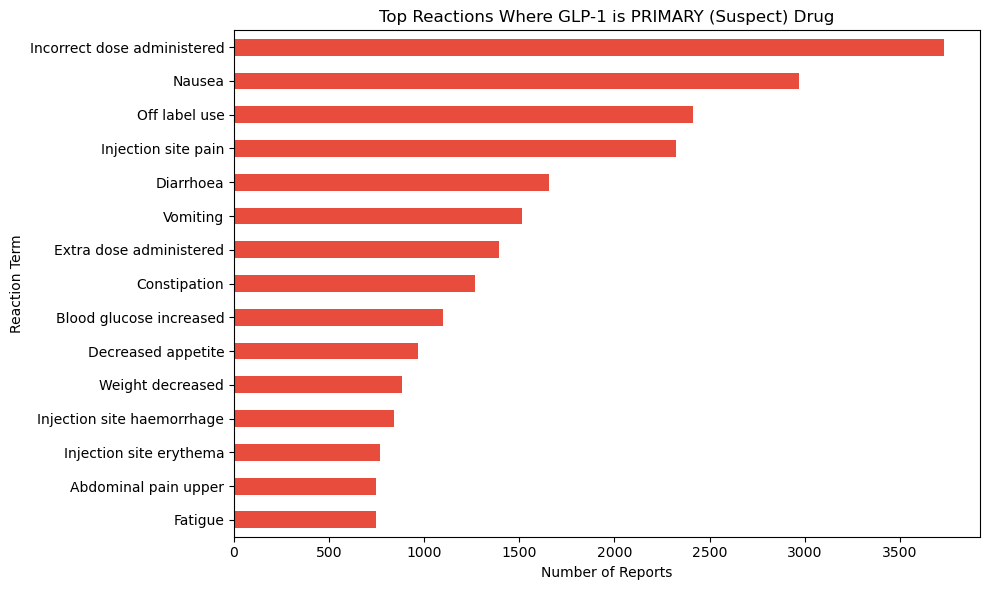

reaction_term_text
Incorrect dose administered    3735
Nausea                         2972
Off label use                  2414
Injection site pain            2323
Diarrhoea                      1656
Vomiting                       1515
Extra dose administered        1395
Constipation                   1269
Blood glucose increased        1098
Decreased appetite              969
Weight decreased                884
Injection site haemorrhage      840
Injection site erythema         768
Abdominal pain upper            748
Fatigue                         746
Name: count, dtype: int64

In [ ]:
primary_reports = drugs[drugs['drug_role'] == 'PRIMARY']['safetyreportid'].unique()
primary_reactions = reactions[reactions['safetyreportid'].isin(primary_reports)]

top_primary = primary_reactions['reaction_term_text'].value_counts().head(15)

plt.figure(figsize=(10, 6))
top_primary.plot(kind='barh', color='#e74c3c')
plt.title('Top Reactions Where GLP-1 is PRIMARY (Suspect) Drug')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction Term')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_primary

## 4. Outcome Severity Distribution

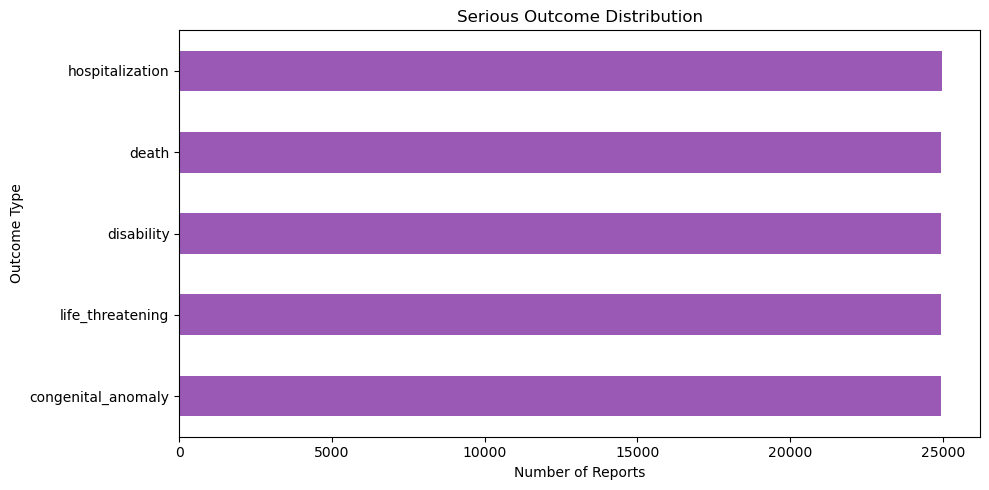


Outcome counts:


hospitalization       24965
death                 24934
life_threatening      24933
disability            24933
congenital_anomaly    24929
dtype: int64

In [ ]:
outcomes = ['death', 'hospitalization', 'life_threatening', 'disability', 'congenital_anomaly']
outcome_counts = reports[outcomes].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 5))
outcome_counts.plot(kind='barh', color='#9b59b6')
plt.title('Serious Outcome Distribution')
plt.xlabel('Number of Reports')
plt.ylabel('Outcome Type')
plt.tight_layout()
plt.show()

print("\nOutcome counts:")
outcome_counts.sort_values(ascending=False)

## 5. Demographics Summary

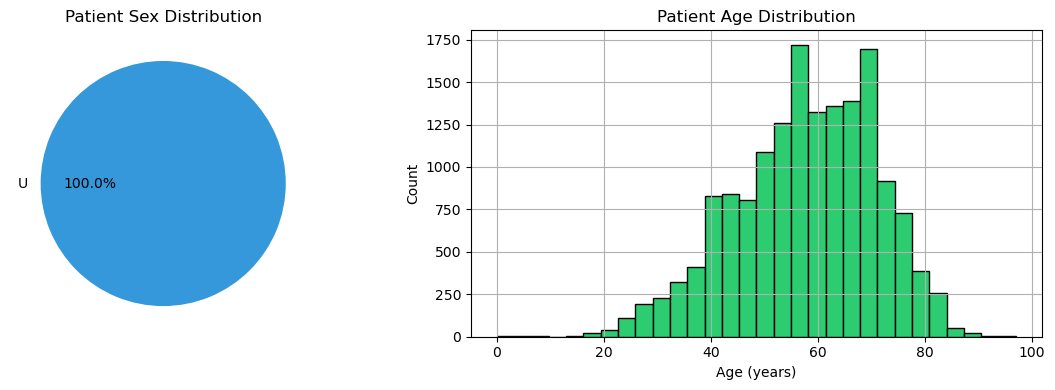

Sex distribution: {'U': 25100}
Age - Mean: 57.8, Median: 59.0
Age - Missing: 9,090 (36.2%)


In [ ]:

sex_counts = reports['patient_sex'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors=['#3498db', '#e74c3c', '#95a5a6'])
axes[0].set_title('Patient Sex Distribution')


reports['patient_age_years'].dropna().hist(bins=30, ax=axes[1], color='#2ecc71', edgecolor='black')
axes[1].set_title('Patient Age Distribution')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(f"Sex distribution: {dict(sex_counts)}")
print(f"Age - Mean: {reports['patient_age_years'].mean():.1f}, Median: {reports['patient_age_years'].median():.1f}")
print(f"Age - Missing: {reports['patient_age_years'].isna().sum():,} ({reports['patient_age_years'].isna().mean()*100:.1f}%)")

## 6. Summary Statistics

In [21]:
print("=" * 50)
print("GLP-1 SAFETY SURVEILLANCE DATASET SUMMARY")
print("=" * 50)
print(f"\nTotal Reports: {len(reports):,}")
print(f"Total Drug Entries: {len(drugs):,}")
print(f"Total Reaction Entries: {len(reactions):,}")
print(f"\nDate Range: {reports['received_date'].min().date()} to {reports['received_date'].max().date()}")
print(f"\nUnique Reaction Terms: {reactions['reaction_term_text'].nunique():,}")
print(f"Unique Drug Names: {drugs['drug_name_original'].nunique():,}")
print("\n" + "=" * 50)
print("LIMITATIONS")
print("=" * 50)
print("- FAERS is voluntary; cannot calculate incidence rates")
print("- Reports do not establish causation")
print("- Subject to reporting bias and duplicate submissions")

GLP-1 SAFETY SURVEILLANCE DATASET SUMMARY

Total Reports: 25,100
Total Drug Entries: 136,581
Total Reaction Entries: 65,341

Date Range: 2024-01-01 to 2024-10-11

Unique Reaction Terms: 2,714
Unique Drug Names: 2,908

LIMITATIONS
- FAERS is voluntary; cannot calculate incidence rates
- Reports do not establish causation
- Subject to reporting bias and duplicate submissions
